<font size="+3" color="#000000"><b>Flight Price Prediction</b></font>

<div style="text-align: center;">
    <img src="https://cdn.businessday.ng/2018/08/Airlines-1.png" alt="Flight Price Prediction" width="550px" /> 
</div>


In [43]:
def basicProjectInfo(fileName):
    df = pd.read_csv(fileName)
    return df

def info(df):
    return df.info()

def checkNull(df):
    return df.isnull().sum()
    

def dropColumns(df,columnList):
    df.drop(columns = columnList,axis=1,inplace = True)
    return df

def dropNull(df):
    df.dropna(inplace=True)
    return df

def categoryChange(df, columnMap):
    for column, dtype_param in columnMap.items():
        if dtype_param == 'date':
            df[column] = pd.to_datetime(df[column])
        else:
            df[column] = df[column].astype(dtype_param)
    return df

def addColumns(df, new_column_name):
    if new_column_name in ['Day', 'Week', 'Month', 'Year']:
        # If the new column name is one of 'Day', 'Week', 'Month', or 'Year'
        date_column = input("Enter the name of the date column: ")
        if date_column in df.columns and pd.api.types.is_datetime64_any_dtype(df[date_column]):
            if new_column_name == 'Day':
                df[new_column_name] = df[date_column].dt.day
            elif new_column_name == 'Week':
                df[new_column_name] = df[date_column].dt.isocalendar().week
            elif new_column_name == 'Month':
                df[new_column_name] = df[date_column].dt.month
            elif new_column_name == 'Year':
                df[new_column_name] = df[date_column].dt.year
        else:
            print("Invalid date column name or not a valid date column.")
    else:
        # If the new column name is different, ask the user for values
        values = input(f"Enter values for the new column '{new_column_name}' (comma-separated): ").split(',')
        df[new_column_name] = values

    return df

       
def outlierDtection(df):
     box_plot(df, hue=None, xlabel=None, title=None)
    
def outlierRemoval(df, method, columns):
    if method == 'drop':
        for col in columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    elif method == 'cap':
        for col in columns:
            lower = df[col].quantile(0.25)
            upper = df[col].quantile(0.75)
            IQR = upper - lower
            upperLimit = upper + 1.5 * IQR
            lowerLimit = lower - 1.5 * IQR
            df[col] = np.where(df[col] > upperLimit, upperLimit, np.where(df[col] < lowerLimit, lowerLimit, df[col]))

    return df

In [49]:

def create_condition(column_name, operator, value):
    if operator == '==':
        return df[column_name] == value
    elif operator == '!=':
        return df[column_name] != value
    elif operator == '>':
        return df[column_name] > value
    elif operator == '<':
        return df[column_name] < value
    elif operator == '>=':
        return df[column_name] >= value
    elif operator == '<=':
        return df[column_name] <= value
    else:
        raise ValueError(f"Invalid operator: {operator}. Use '==', '!=', '>', '<', '>=', '<='.")

def get_user_condition():
    column_name = input("Enter column name: ").strip()
    operator = input("Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ").strip()
    value = input("Enter value: ").strip()

    return create_condition(column_name, operator, value)

def apply_user_conditions(df):
    conditions = []
    logical_operator = 'and'  # Initialize logical_operator outside the loop
    
    while True:
        condition = get_user_condition()
        conditions.append(condition)

        apply_more = input("Do you want to apply more conditions? (yes/no): ").strip().lower()
        if apply_more == 'yes':
            logical_operator = input("Enter logical operator ('and' or 'or'): ").strip().lower()
        else:
            break

        if logical_operator not in ['and', 'or']:
            raise ValueError(f"Invalid logical operator: {logical_operator}. Use 'and' or 'or'.")

    if logical_operator == 'and':
        result_condition = pd.Series(True, index=df.index)
        for cond in conditions:
            result_condition = result_condition & cond
    elif logical_operator == 'or':
        result_condition = pd.Series(False, index=df.index)
        for cond in conditions:
            result_condition = result_condition | cond

    # Apply the combined condition to filter the DataFrame
    result_df = df[result_condition]
    return result_df



In [3]:
def grouping(df):
    
    
    group_columns = [col.strip().replace("'", "") for col in input("Enter group columns separated by commas: ").split(',')]

   
    aggregation_map = {}
    while True:
        column_name = input("Enter column for aggregation (or type 'done' to finish): ").strip()
        if column_name.lower() == 'done':
            break

        aggregation_function = input(f"Enter aggregation function for {column_name} (e.g., 'sum', 'mean', 'count'): ").strip()
        alias = input(f"Enter alias for {column_name}: ").strip()

        aggregation_map[alias] = (column_name, aggregation_function)

   
    sort_columns = [col.strip().replace("'", "") for col in input("Enter columns for sorting separated by commas: ").split(',')]
    sort_order = input("Enter sorting order ('asc' or 'desc'): ").strip()
    if sort_order=='asc':
        order = True
    else:
        order = False

  
    column_tuple = list(aggregation_map.values())
    
    
    grouped_df = df.groupby(group_columns).agg(dict(column_tuple)).sort_values(by=sort_columns, ascending=order)

    
    grouped_df.reset_index(inplace=True)

    return grouped_df



<font color="#FF8C00"><h2>Funtions for Graphs</font>

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def pie_plot(df, values, labels, xlabel=None, ylabel=None, title=None):
    sns.pie(df[values], labels=df[labels], autopct='%1.1f%%')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def count_plot(df, x, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.countplot(x=x, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def kde_plot(df, x, xlabel=None, title=None):
    sns.kdeplot(data=df, x=x, fill=True)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

def scatter_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.scatterplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def regression_plot(df, x, y, xlabel=None, ylabel=None, title=None):
    sns.regplot(x=x, y=y, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def heatmap(df, xlabel=None, ylabel=None, title=None):
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def box_plot(df, hue=None, xlabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.boxplot(data=df, x=hue)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

def rel_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.relplot(x=x, y=y, hue=hue, data=df, kind='line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def choose_plot():
    print("Choose a plot type:")
    print("1. Bar Plot")
    print("2. Pie Plot")
    print("3. Count Plot")
    print("4. KDE Plot")
    print("5. Scatter Plot")
    print("6. Regression Plot")
    print("7. Heatmap")
    print("8. Box Plot")
    print("9. Relational Plot")
    
    choice = input("Enter the number corresponding to your choice: ")

    if not choice.isdigit() or int(choice) not in range(1, 10):
        print("Invalid choice. Please enter a number between 1 and 9.")
        return

    choice = int(choice)
    if choice == 1:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        bar_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 2:
        values = input("Enter the name of the values variable: ")
        labels = input("Enter the name of the labels variable: ")
        pie_plot(df, values, labels, xlabel, ylabel, title)
        
    elif choice == 3:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        count_plot(df, x, hue, xlabel, ylabel, title)
        
    elif choice == 4:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        kde_plot(df, x, xlabel, title)
        
    elif choice == 5:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        scatter_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 6:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        regression_plot(df, x, y, xlabel, ylabel, title)
        
    elif choice == 7:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        heatmap(df, xlabel, ylabel, title)
        
    elif choice == 8:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        box_plot(df, hue, xlabel, title)
        
    elif choice == 9:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        rel_plot(df, x, y, hue, xlabel, ylabel, title)
    else:
        print("Invalid choice. Please enter a number between 1 and 9.")


In [5]:
def custom_train_test_split(data):

    target_column = input("Enter the target variable column name: ")
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")
    test_size = float(input("Enter the test size (as a decimal between 0.0 and 1.0): "))
    random_state_str = input("Enter the random state (optional, press Enter to use default 10): ")
    random_state = int(random_state_str) if random_state_str else 10
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [74]:
def custom_transform(X_train,X_test):
    # Get user input for columns to apply different transformers
    power_columns = input("Enter columns to apply Power Transformer (comma-separated, press Enter to skip): ")
    function_columns = input("Enter columns to apply Function Transformer (comma-separated, press Enter to skip): ")
    ohe_columns = input("Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): ")
    ordinal_columns = input("Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): ")
    standard_columns = input("Enter columns to apply StandardScaler (comma-separated, press Enter to skip): ")

    # Process input for Power Transformer
    power_columns = [col.strip() for col in power_columns.split(',') if col.strip()]
    if not power_columns:
        power_columns = None

    # Process input for Function Transformer
    function_columns = [col.strip() for col in function_columns.split(',') if col.strip()]
    if not function_columns:
        function_columns = None

    # Process input for OneHotEncoder
    ohe_columns = [col.strip() for col in ohe_columns.split(',') if col.strip()]
    if not ohe_columns:
        ohe_columns = None

    # Process input for Ordinal Encoder
    ordinal_columns = [col.strip() for col in ordinal_columns.split(',') if col.strip()]
    if not ordinal_columns:
        ordinal_columns = None

    # Process input for StandardScaler
    standard_columns = [col.strip() for col in standard_columns.split(',') if col.strip()]
    if not standard_columns:
        standard_columns = None

    # Define the transformers
    transformers = [
        ('power', PowerTransformer(), power_columns),
        ('function', FunctionTransformer(np.log1p), function_columns),
        ('ohe', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), ohe_columns),
        ('ordinal', OrdinalEncoder(), ordinal_columns),
        ('standard', StandardScaler(), standard_columns)
    ]

    # Filter out transformers with None columns
    transformers = [(name, transformer, columns) for name, transformer, columns in transformers if columns is not None]

    # Define the ColumnTransformer
    preprocessor = ColumnTransformer(transformers)

    # Create a pipeline with the ColumnTransformer and any additional steps
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Assuming 'data' is your DataFrame
    # Fit and transform the training data
    X_train = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test = pipeline.transform(X_test)

    return X_train, X_test

In [7]:
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def decision_tree(X_train, y_train, X_test, params=None):
    model = DecisionTreeRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def random_forest(X_train, y_train, X_test, params=None):
    model = RandomForestRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def knn(X_train, y_train, X_test, params=None):
    model = KNeighborsRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def support_vector_machine(X_train, y_train, X_test, params=None):
    model = SVR()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def xgboost(X_train, y_train, X_test, params=None):
    model = XGBRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [136]:
def select_model():
    print("Select a model:")
    print("1. Linear Regression")
    print("2. Decision Tree")
    print("3. Random Forest")
    print("4. k-Nearest Neighbors")
    print("5. Support Vector Machine")
    print("6. XGBoost")

    choice = int(input("Enter the number corresponding to your choice: "))
    return choice

def get_hyperparameters(model_choice):
    if model_choice == 1:
        return None
    elif model_choice == 2:
        max_depths = input("Enter max depths for Decision Tree (comma-separated): ").split(',')
        return {'max_depth': [int(depth) for depth in max_depths]}
    elif model_choice == 3:
        n_estimators = int(input("Enter the number of estimators for Random Forest: "))
        max_depths = input("Enter max depths for Random Forest (comma-separated): ").split(',')
        return {'n_estimators': [n_estimators], 'max_depth': [int(depth) for depth in max_depths]}
    elif model_choice == 4:
        return {'n_neighbors': int(input("Enter the number of neighbors for k-Nearest Neighbors: "))}
    elif model_choice == 5:
        return {'C': float(input("Enter the regularization parameter (C) for SVM:")),
                'kernel': input("Enter the kernel for SVM (linear/rbf): ")}
    elif model_choice == 6:
        n_estimators = int(input("Enter the number of estimators for XGBoost: "))
        max_depths = int(input("Enter the max depth for XGBoost: "))
        return {'n_estimators': [n_estimators], 'max_depth': [max_depths]}


def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    return r2, rmse

def model_evaluation_df(y_actual, y_pred, model_name):
    r2 = r2_score(y_actual, y_pred)
    rmse = mean_squared_error(y_actual, y_pred, squared=False)

    df_graph = pd.DataFrame({
        'y_actual': [y_actual],
        'y_pred': [y_pred]})
    regression_plot(df_graph, y_actual,y_pred, xlabel=None, ylabel=None, title=None)
    
    
    df = pd.DataFrame({
        'Model': [model_name],
        'R2 Score': [r2],
        'RMSE': [rmse]})   
    return df

def hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice):
    hyperparameters = get_hyperparameters(model_choice)

    if model_choice == 1:
        y_pred = linear_regression(X_train, y_train, X_test)
        model_name = 'Linear Regression'
    elif model_choice == 2:
        y_pred = decision_tree(X_train, y_train, X_test, hyperparameters)
        model_name = 'Decision Tree'
    elif model_choice == 3:
        y_pred = random_forest(X_train, y_train, X_test, hyperparameters)
        model_name = 'Random Forest'
    elif model_choice == 4:
        y_pred = knn(X_train, y_train, X_test, hyperparameters)
        model_name = 'k-Nearest Neighbors'
    elif model_choice == 5:
        y_pred = support_vector_machine(X_train, y_train, X_test, hyperparameters)
        model_name = 'Support Vector Machine'
    elif model_choice == 6:
        y_pred = xgboost(X_train, y_train, X_test, hyperparameters)
        model_name = 'XGBoost'

    df = model_evaluation_df(y_test, y_pred, model_name)
    return df


In [9]:


import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor



In [10]:
file_name = input("Enter the CSV file name: ")
df = basicProjectInfo(file_name)
df

Enter the CSV file name: Flight_booking.csv


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
checkNull(df)

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [15]:
# Drop columns
columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
df = dropColumns(df, columns_to_drop)
print("\nDataFrame after dropping columns:")
df

Enter columns to drop (comma-separated): Unnamed: 0

DataFrame after dropping columns:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
# Drop null values
#uncomment if you want to drop null values
#df = dropNull(df)
#print("\nDataFrame after dropping null values:")
#print(df.head())


In [11]:
# Category change
#uncomment if you want to change dtype
#column_map = {'DateColumn': 'date', 'CategoryColumn': 'category'}
#df = categoryChange(df, column_map)
#print("\nDataFrame after category change:")
#print(df.head())


In [12]:
# Add columns
#uncomment if you want to add columns
#addColumns(df, new_column_name))
#df.head()

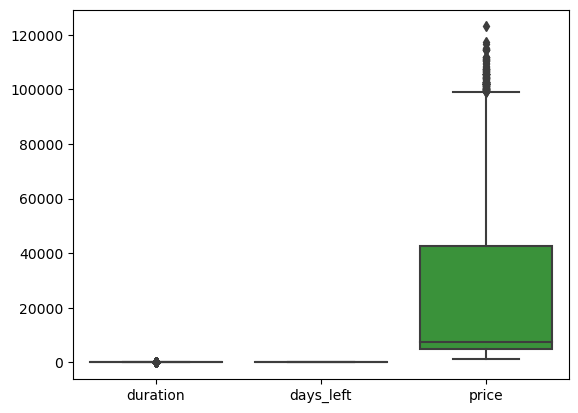

In [36]:
# Outlier detection and removal
outlierDtection(df)

In [44]:
columns = input("Enter columns to treat (comma-separated): ").split(',')
method = input("Enter how to treat outlier drop/cap: ")
df = outlierRemoval(df, method, columns)
df

Enter columns to treat (comma-separated): price
Enter how to treat outlier drop/cap: cap


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105.0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099.0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585.0


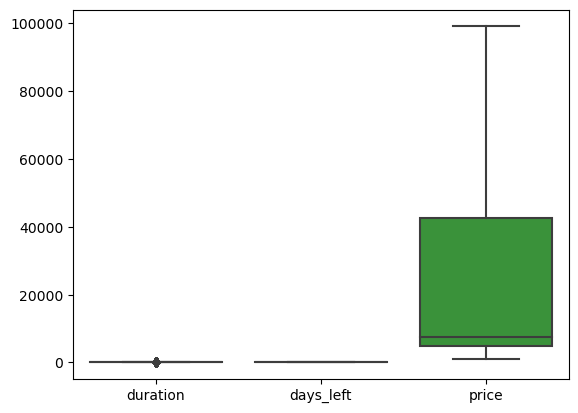

In [45]:
# Outlier detection and removal
outlierDtection(df)

Filtering


In [50]:
#flights with zero stops 
result_df = apply_user_conditions(df)
result_df

Enter column name: stops
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: zero
Do you want to apply more conditions? (yes/no): no


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
299945,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,45,15000.0
299987,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,46,15000.0
300029,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,47,15000.0
300069,Air_India,AI-545,Chennai,Night,zero,Night,Hyderabad,Business,1.33,48,15000.0


In [51]:
# All flights between Delhi and Kolkata
result_df = apply_user_conditions(df)
result_df

Enter column name: source_city
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: Delhi
Do you want to apply more conditions? (yes/no): yes
Enter logical operator ('and' or 'or'): and
Enter column name: destination_city
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: Kolkata
Do you want to apply more conditions? (yes/no): no


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
20126,GO_FIRST,G8-101,Delhi,Early_Morning,zero,Early_Morning,Kolkata,Economy,2.17,1,5954.0
20127,GO_FIRST,G8-103,Delhi,Evening,zero,Night,Kolkata,Economy,2.33,1,5954.0
20128,Indigo,6E-353,Delhi,Early_Morning,zero,Morning,Kolkata,Economy,2.25,1,5955.0
20129,Indigo,6E-483,Delhi,Early_Morning,zero,Morning,Kolkata,Economy,2.25,1,5955.0
20130,GO_FIRST,G8-392,Delhi,Afternoon,one,Early_Morning,Kolkata,Economy,16.00,1,5954.0
...,...,...,...,...,...,...,...,...,...,...,...
219116,Vistara,UK-955,Delhi,Evening,one,Morning,Kolkata,Business,15.92,49,75721.0
219117,Vistara,UK-955,Delhi,Evening,one,Evening,Kolkata,Business,23.17,49,75721.0
219118,Vistara,UK-955,Delhi,Evening,one,Evening,Kolkata,Business,26.17,49,75721.0
219119,Vistara,UK-829,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,12.83,49,78913.0


In [101]:
# Apply user-defined grouping
result_df = grouping(df)

result_df

Enter group columns separated by commas: 'source_city', 'departure_time'
Enter column for aggregation (or type 'done' to finish): flight
Enter aggregation function for flight (e.g., 'sum', 'mean', 'count'): count
Enter alias for flight: flight_count
Enter column for aggregation (or type 'done' to finish): done
Enter columns for sorting separated by commas: source_city
Enter sorting order ('asc' or 'desc'): desc
   source_city departure_time  flight
0       Mumbai          Night    9499
1       Mumbai        Morning   12606
2       Mumbai     Late_Night     268
3       Mumbai        Evening   13082
4       Mumbai  Early_Morning   14955
5       Mumbai      Afternoon   10486
6      Kolkata        Evening    9594
7      Kolkata      Afternoon    7863
8      Kolkata  Early_Morning    8133
9      Kolkata        Morning   12065
10     Kolkata     Late_Night     114
11     Kolkata          Night    8578
12   Hyderabad  Early_Morning    8524
13   Hyderabad          Night    9109
14   Hyderabad 

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 3
Enter the x-axis label: Airlines
Enter the y-axis label: Count
Enter the plot title: Airlines Count Plot
Enter the name of the x-axis variable: airline
Enter the name of the hue variable (optional, press Enter to skip): 


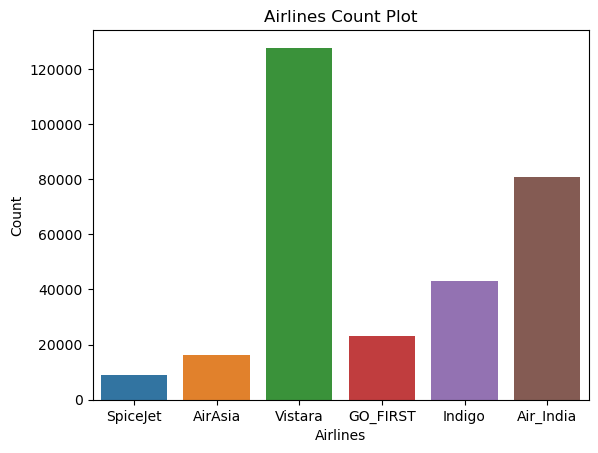

In [55]:
# Visualization
choose_plot()

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 9
Enter the x-axis label: DAYS LEFT
Enter the y-axis label: PRICE
Enter the plot title: Range of price of flights with source and destination city according to the days left
Enter the name of the x-axis variable: days_left
Enter the name of the y-axis variable: price
Enter the name of the hue variable (optional, press Enter to skip): source_city


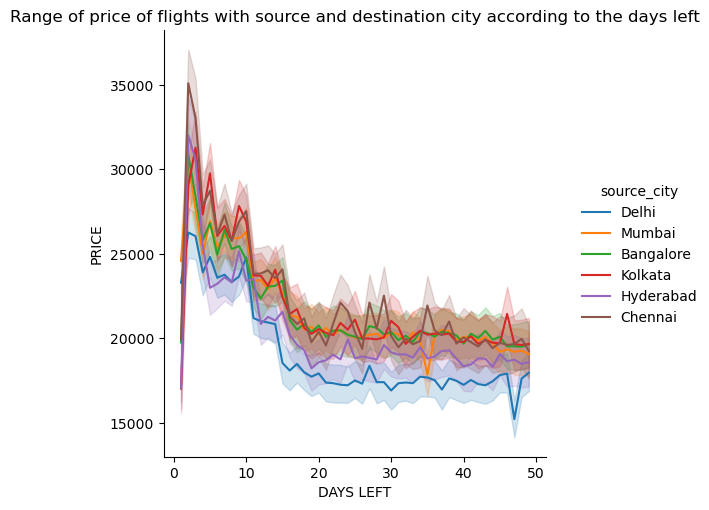

In [58]:
choose_plot()

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 7
Enter the x-axis label: Columns
Enter the y-axis label: Correlation
Enter the plot title: HEATMAP


C:\Users\anike\AppData\Local\Temp\ipykernel_20472\4264525892.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


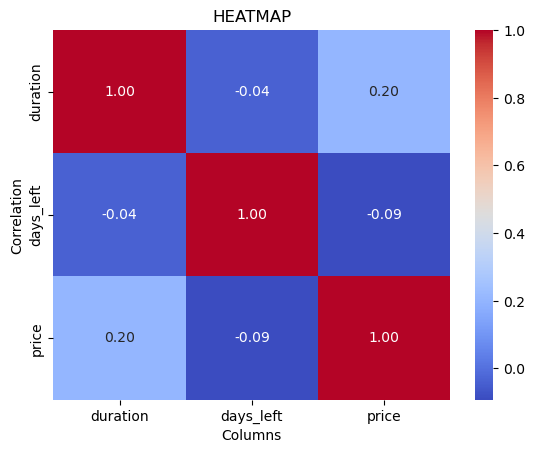

In [59]:
choose_plot()

In [70]:
#Train Test Split
X_train, X_test, y_train, y_test = custom_train_test_split(df)

Enter the target variable column name: price
Enter the test size (as a decimal between 0.0 and 1.0): 0.2
Enter the random state (optional, press Enter to use default 10): 2


In [71]:
X_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
259861,Air_India,AI-804,Bangalore,Early_Morning,one,Night,Chennai,Business,17.42,22
179199,Vistara,UK-860,Hyderabad,Early_Morning,one,Night,Chennai,Economy,13.42,35
45507,Vistara,UK-877,Mumbai,Morning,one,Afternoon,Delhi,Economy,4.92,15
22623,GO_FIRST,G8-7535,Delhi,Evening,one,Night,Kolkata,Economy,6.58,16
91847,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Delhi,Economy,13.08,39
...,...,...,...,...,...,...,...,...,...,...
33867,Vistara,UK-927,Delhi,Morning,one,Early_Morning,Hyderabad,Economy,22.33,39
84434,Vistara,UK-755,Bangalore,Afternoon,one,Afternoon,Delhi,Economy,27.25,3
95816,Air_India,AI-507,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,13.50,12
203245,Vistara,UK-824,Chennai,Night,one,Night,Hyderabad,Economy,24.42,9


In [75]:
#applying transformers

X_train, X_test = custom_transform(X_train, X_test)

Enter columns to apply Power Transformer (comma-separated, press Enter to skip): duration
Enter columns to apply Function Transformer (comma-separated, press Enter to skip): days_left
Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): 
Enter columns to apply StandardScaler (comma-separated, press Enter to skip): 


C:\Users\anike\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [76]:
X_train

array([[ 0.79375283,  3.13549422,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31680968,  3.58351894,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.04849457,  2.77258872,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.32704056,  2.56494936,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.50314626,  2.30258509,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16333705,  3.68887945,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(240122, 1582)
(60031, 1582)
(240122,)
(60031,)


In [78]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df

Select a model:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors
5. Support Vector Machine
6. XGBoost
Enter the number corresponding to your choice: 1


,Model,R2 Score,RMSE
0,Linear Regression,-1.597938e+18,2.871371e+13


In [81]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df


Select a model:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors
5. Support Vector Machine
6. XGBoost
Enter the number corresponding to your choice: 2
Enter max depths for Decision Tree (comma-separated): 5,7,10,12,15


,Model,R2 Score,RMSE
0,Decision Tree,0.974701,3612.93712


Select a model:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors
5. Support Vector Machine
6. XGBoost
Enter the number corresponding to your choice: 3
Enter the number of estimators for Random Forest: 1
Enter max depths for Random Forest (comma-separated): 5,7,10,12,15


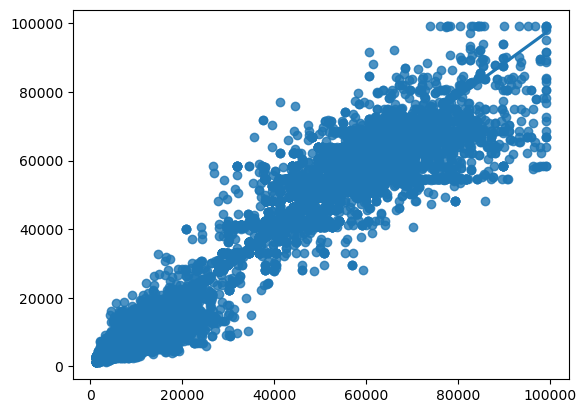

,Model,R2 Score,RMSE
0,Random Forest,0.974077,3657.245624


In [137]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df
